# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
print(weather_api_key)

831bce9438a9ff72298cdb00732fe4a7


### Generate the Cities List by Using the `citipy` Library

In [30]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 557


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [31]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=imperial"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        response = requests.get(city_url)
        # Check for any request error
        if response.status_code == 200:
            print("The API request was successful. Status code: 200")
        else:
            print(f"There was an error with the API request. Status code: {response.status_code}")
        # Parse the JSON and retrieve data
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
The API request was successful. Status code: 200
Processing Record 2 of Set 1 | kodiak
The API request was successful. Status code: 200
Processing Record 3 of Set 1 | iqaluit
The API request was successful. Status code: 200
Processing Record 4 of Set 1 | port-aux-francais
The API request was successful. Status code: 200
Processing Record 5 of Set 1 | happy valley-goose bay
The API request was successful. Status code: 200
Processing Record 6 of Set 1 | monrovia
The API request was successful. Status code: 200
Processing Record 7 of Set 1 | parabel'
The API request was successful. Status code: 200
Processing Record 8 of Set 1 | znamenskoye
The API request was successful. Status code: 200
Processing Record 9 of Set 1 | blackmans bay
The API request was successful. Status code: 200
Processing Record 10 of Set 1 | port mathurin
The API request was successful. Status code: 200
Processing Reco

In [32]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          533
Lat           533
Lng           533
Max Temp      533
Humidity      533
Cloudiness    533
Wind Speed    533
Country       533
Date          533
dtype: int64

In [33]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,67.73,62,100,9.22,PN,1720578604
1,kodiak,57.7900,-152.4072,51.31,100,100,4.61,US,1720578605
2,iqaluit,63.7506,-68.5145,42.53,86,75,3.44,CA,1720578588
3,port-aux-francais,-49.3500,70.2167,40.51,91,99,28.21,TF,1720578608
4,happy valley-goose bay,53.3168,-60.3315,64.71,94,75,2.30,CA,1720578609


In [34]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [35]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,67.73,62,100,9.22,PN,1720578604
1,kodiak,57.7900,-152.4072,51.31,100,100,4.61,US,1720578605
2,iqaluit,63.7506,-68.5145,42.53,86,75,3.44,CA,1720578588
3,port-aux-francais,-49.3500,70.2167,40.51,91,99,28.21,TF,1720578608
4,happy valley-goose bay,53.3168,-60.3315,64.71,94,75,2.30,CA,1720578609


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

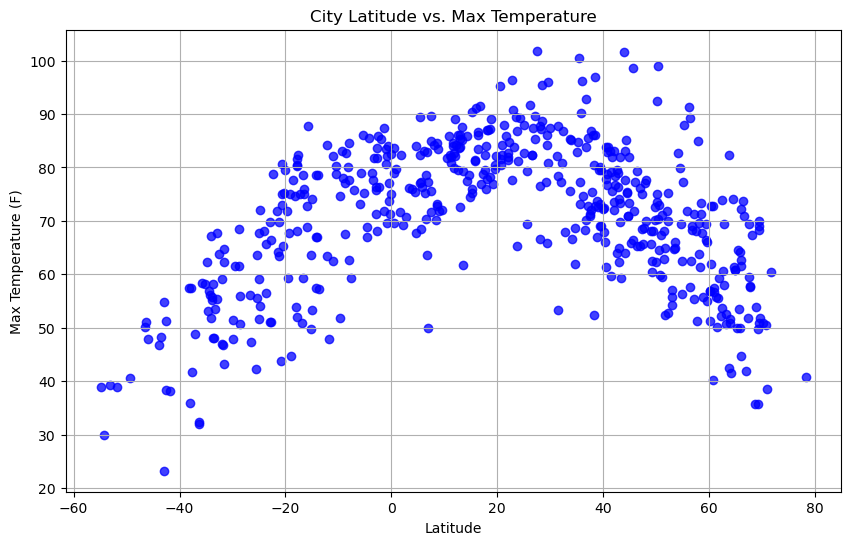

In [37]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], color='blue', alpha=0.75)
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

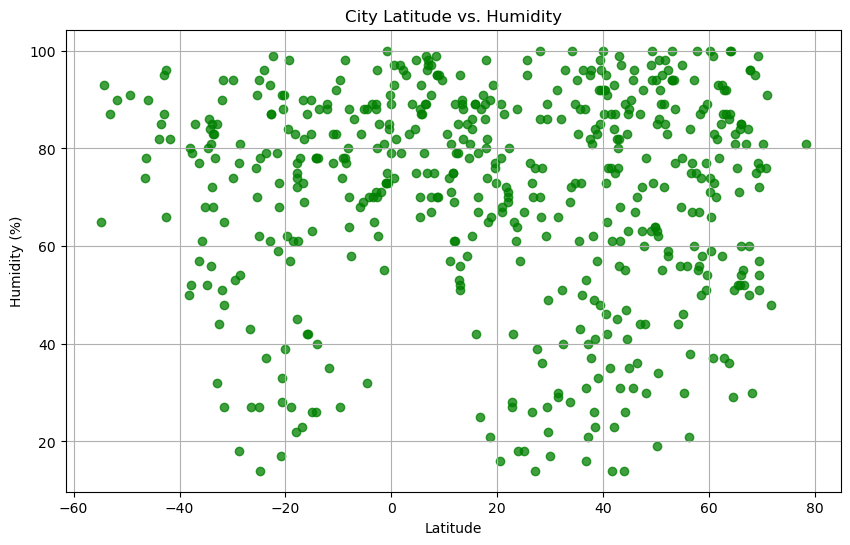

In [38]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], color='green', alpha=0.75)
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

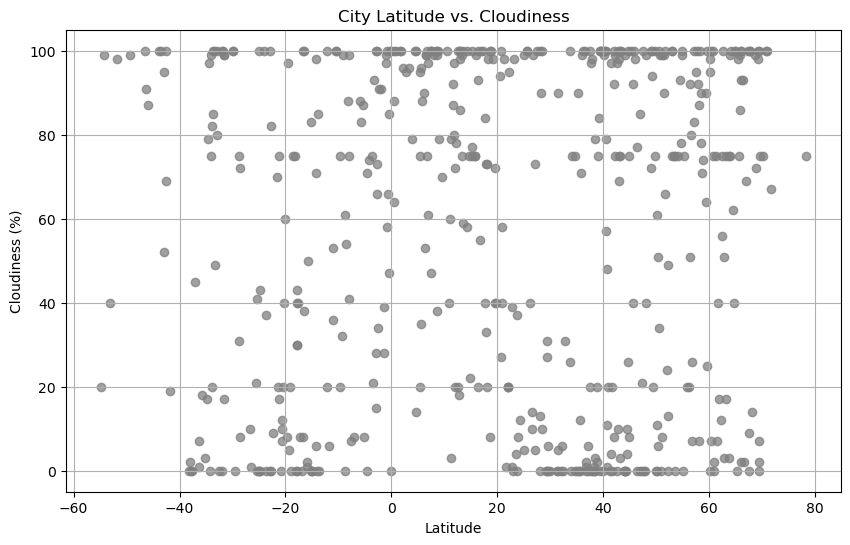

In [39]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], color='gray', alpha=0.75)
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

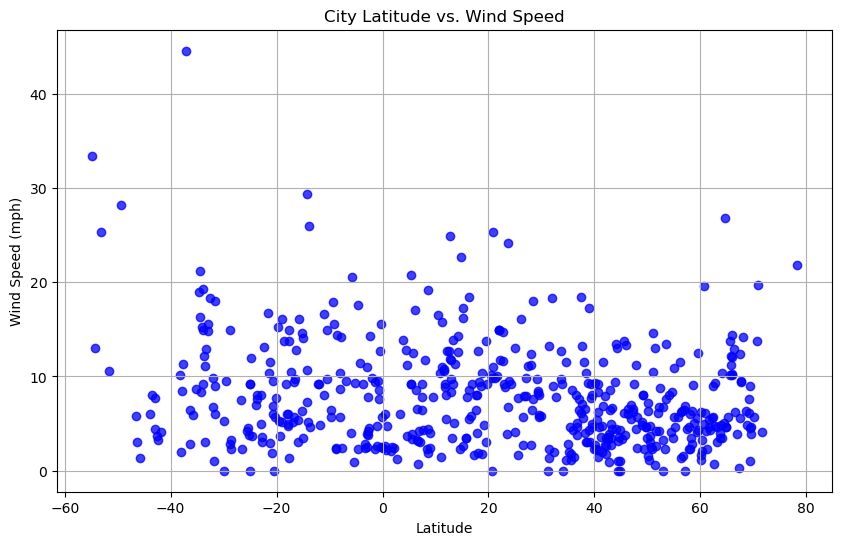

In [40]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], color='blue', alpha=0.75)
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [41]:
def plot_linear_regression(x_values, y_values):
    # Calculate linear regression parameters
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"


In [42]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kodiak,57.7900,-152.4072,51.31,100,100,4.61,US,1720578605
2,iqaluit,63.7506,-68.5145,42.53,86,75,3.44,CA,1720578588
4,happy valley-goose bay,53.3168,-60.3315,64.71,94,75,2.30,CA,1720578609
5,monrovia,6.3005,-10.7969,75.25,89,53,8.57,LR,1720578537
6,parabel',58.6978,81.4825,67.80,58,71,9.10,RU,1720578612


In [43]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,67.73,62,100,9.22,PN,1720578604
3,port-aux-francais,-49.3500,70.2167,40.51,91,99,28.21,TF,1720578608
8,blackmans bay,-43.0167,147.3167,54.73,95,95,7.76,AU,1720578615
9,port mathurin,-19.6833,63.4167,71.76,62,8,15.26,MU,1720578616
10,papatowai,-46.5619,169.4708,50.20,74,100,5.79,NZ,1720578618


###  Temperature vs. Latitude Linear Regression Plot

Text(0.0069, 101.86, 'r^2 = 0.35')

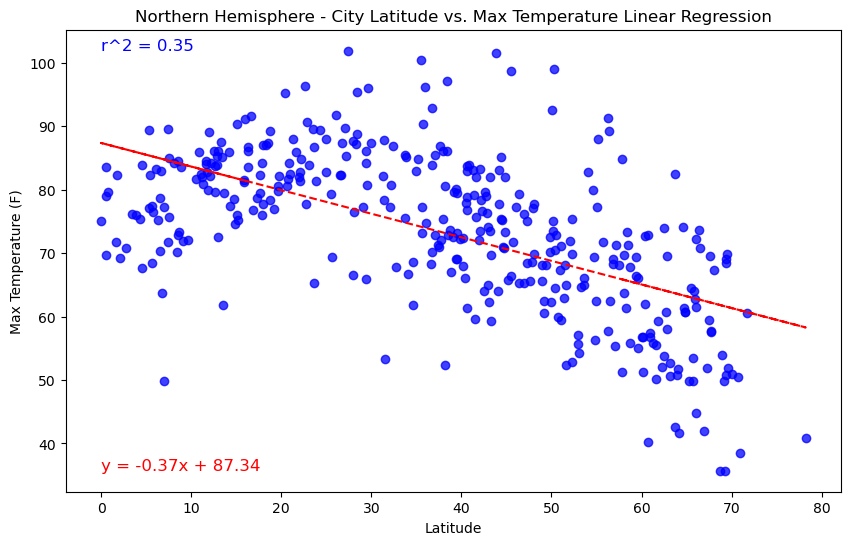

In [44]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Create scatter plot and linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, color='blue', alpha=0.75)
plt.plot(x_values, regress_values, "--", color='red')

# Annotate the linear regression equation on the plot
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="red")

# Set labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - City Latitude vs. Max Temperature Linear Regression')

# Display the correlation coefficient on the plot
plt.annotate(f"r^2 = {rvalue**2:.2f}", (min(x_values), max(y_values)), fontsize=12, color="blue")

Text(-54.8, 87.78, 'r^2 = 0.58')

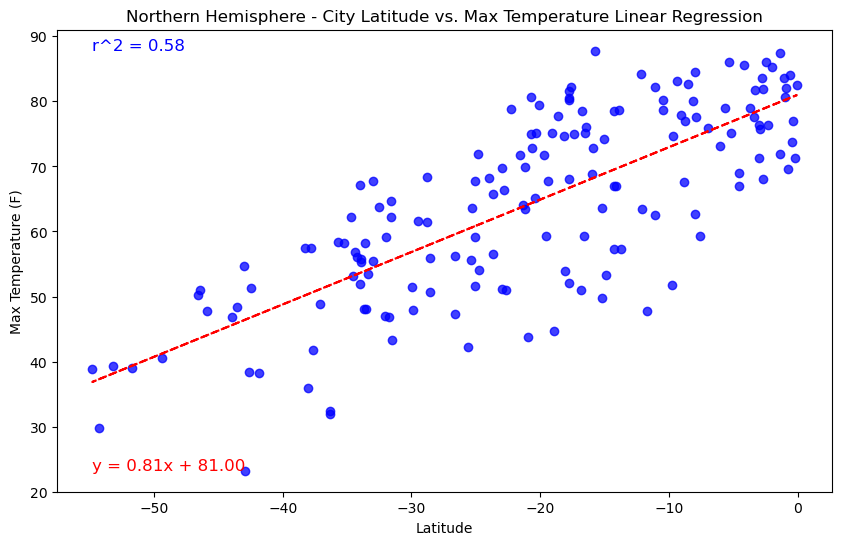

In [45]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Create scatter plot and linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, color='blue', alpha=0.75)
plt.plot(x_values, regress_values, "--", color='red')

# Annotate the linear regression equation on the plot
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="red")

# Set labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - City Latitude vs. Max Temperature Linear Regression')

# Display the correlation coefficient on the plot
plt.annotate(f"r^2 = {rvalue**2:.2f}", (min(x_values), max(y_values)), fontsize=12, color="blue")

**Discussion about the linear relationship:** The closer the city is to the equator, the higher the max temp is

### Humidity vs. Latitude Linear Regression Plot

Text(0.0069, 100, 'r^2 = 0.01')

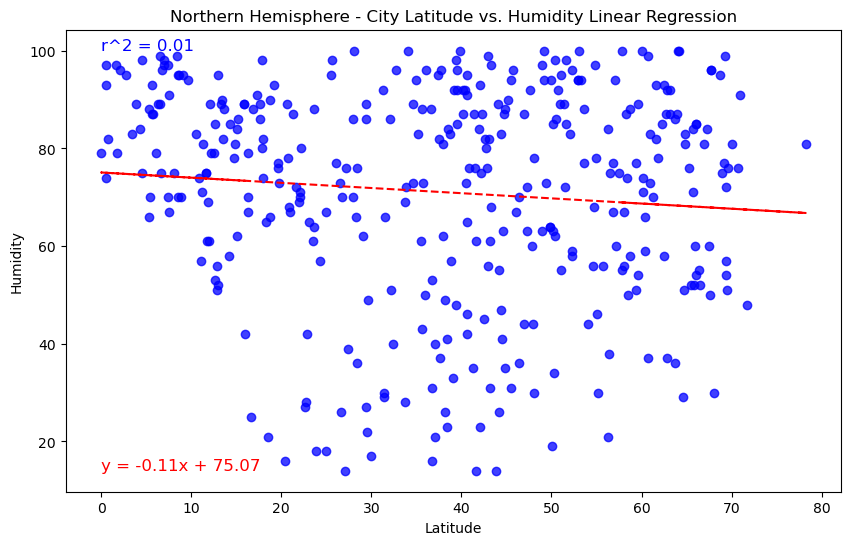

In [46]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Create scatter plot and linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, color='blue', alpha=0.75)
plt.plot(x_values, regress_values, "--", color='red')

# Annotate the linear regression equation on the plot
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="red")

# Set labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - City Latitude vs. Humidity Linear Regression')

# Display the correlation coefficient on the plot
plt.annotate(f"r^2 = {rvalue**2:.2f}", (min(x_values), max(y_values)), fontsize=12, color="blue")

Text(-54.8, 100, 'r^2 = 0.00')

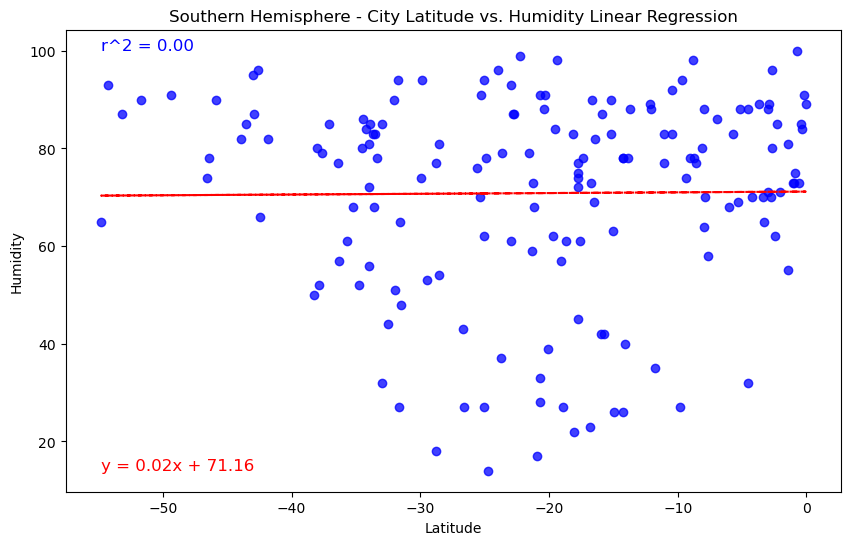

In [47]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Create scatter plot and linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, color='blue', alpha=0.75)
plt.plot(x_values, regress_values, "--", color='red')

# Annotate the linear regression equation on the plot
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="red")

# Set labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - City Latitude vs. Humidity Linear Regression')

# Display the correlation coefficient on the plot
plt.annotate(f"r^2 = {rvalue**2:.2f}", (min(x_values), max(y_values)), fontsize=12, color="blue")

**Discussion about the linear relationship:** Humidity is not affected by latitude since the r value is 0.

### Cloudiness vs. Latitude Linear Regression Plot

Text(0.0069, 100, 'r^2 = 0.01')

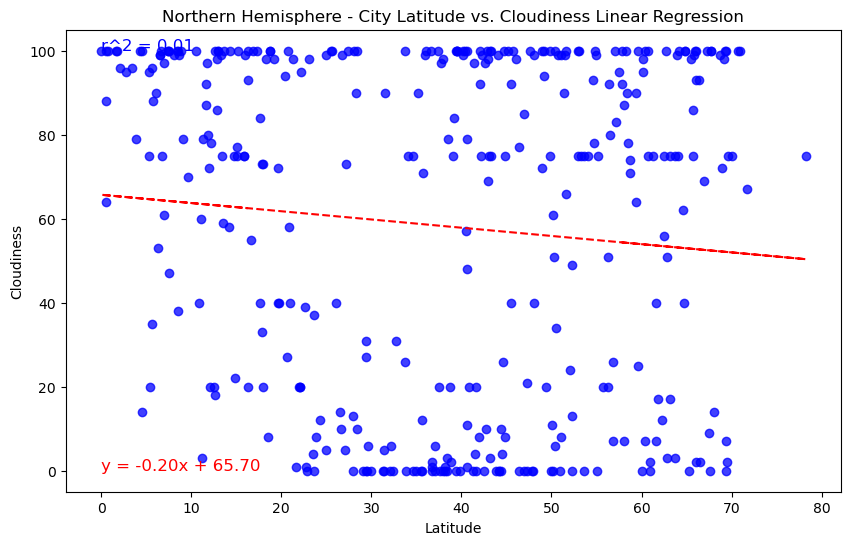

In [48]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Create scatter plot and linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, color='blue', alpha=0.75)
plt.plot(x_values, regress_values, "--", color='red')

# Annotate the linear regression equation on the plot
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="red")

# Set labels and title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - City Latitude vs. Cloudiness Linear Regression')

# Display the correlation coefficient on the plot
plt.annotate(f"r^2 = {rvalue**2:.2f}", (min(x_values), max(y_values)), fontsize=12, color="blue")

Text(-54.8, 100, 'r^2 = 0.00')

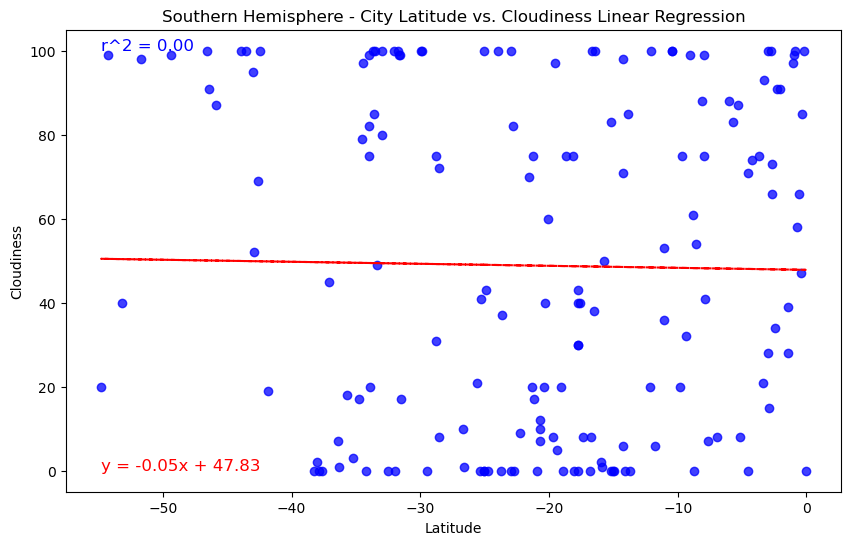

In [49]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Create scatter plot and linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, color='blue', alpha=0.75)
plt.plot(x_values, regress_values, "--", color='red')

# Annotate the linear regression equation on the plot
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="red")

# Set labels and title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - City Latitude vs. Cloudiness Linear Regression')

# Display the correlation coefficient on the plot
plt.annotate(f"r^2 = {rvalue**2:.2f}", (min(x_values), max(y_values)), fontsize=12, color="blue")

**Discussion about the linear relationship:** Cloudiness is not affected by latitude, evidenced by the r value of 0

### Wind Speed vs. Latitude Linear Regression Plot

Text(1.1667, 14.75, 'r^2 = 0.02')

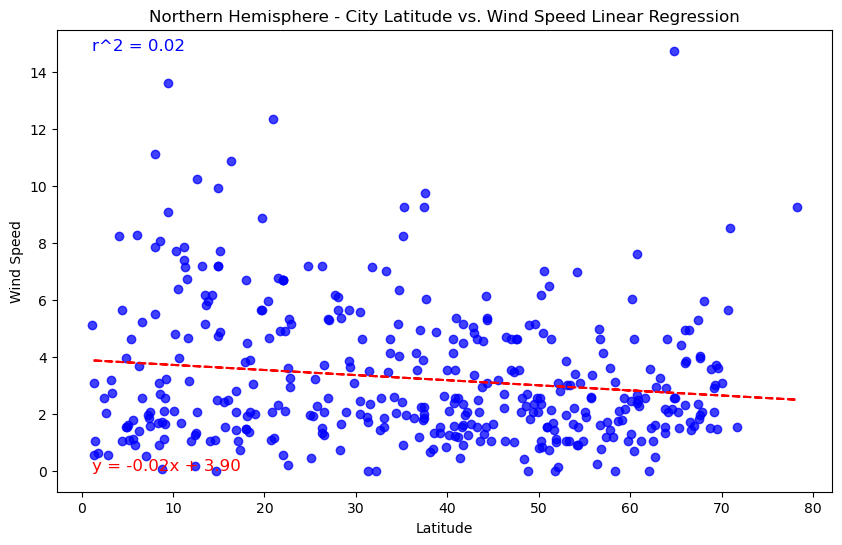

In [25]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Create scatter plot and linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, color='blue', alpha=0.75)
plt.plot(x_values, regress_values, "--", color='red')

# Annotate the linear regression equation on the plot
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="red")

# Set labels and title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere - City Latitude vs. Wind Speed Linear Regression')

# Display the correlation coefficient on the plot
plt.annotate(f"r^2 = {rvalue**2:.2f}", (min(x_values), max(y_values)), fontsize=12, color="blue")

Text(-54.8, 19.03, 'r^2 = 0.07')

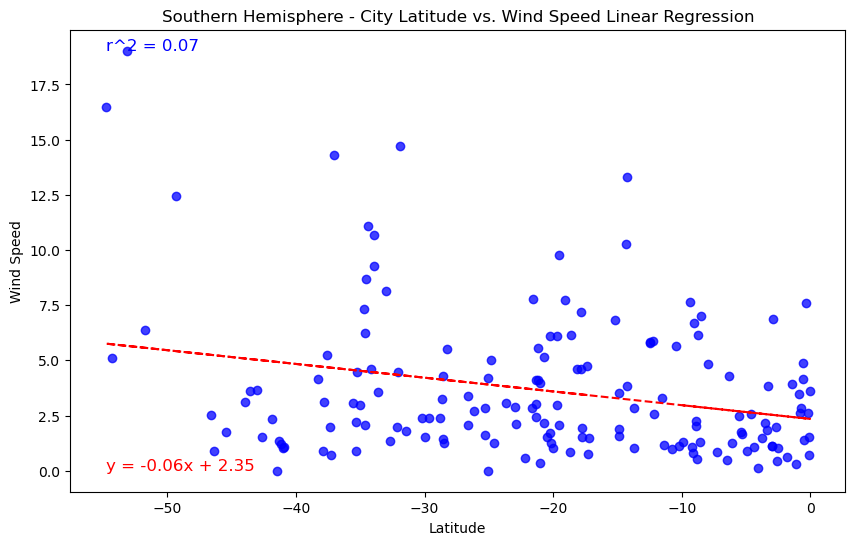

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Create scatter plot and linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, color='blue', alpha=0.75)
plt.plot(x_values, regress_values, "--", color='red')

# Annotate the linear regression equation on the plot
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="red")

# Set labels and title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere - City Latitude vs. Wind Speed Linear Regression')

# Display the correlation coefficient on the plot
plt.annotate(f"r^2 = {rvalue**2:.2f}", (min(x_values), max(y_values)), fontsize=12, color="blue")

**Discussion about the linear relationship:** Cloudiness in cities in the southern hemisphere are slightly more impacted by latitude but neither hemisphere is affected much